<a href="https://colab.research.google.com/github/balszeg/deep_learning_kishf1/blob/master/GWCSU3_kishf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the necessary utilities

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import librosa
import librosa.display
import IPython.display as ipd
from google.colab import drive
from PIL import Image

#Mounting the user's Google Drive, from where the program load the input datas 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setting the right path for the images. **Important to note**, the user has to have the similar directory structure, as the code indicate below:


In [2]:
image_path = "content/drive/My Drive/images"
%cd /content/drive/My\ Drive/images

/content/drive/My Drive/images


Reading in and displaying the pictures with original sizes:

['koala.jpg', 'husky.jpg', 'python.jpg', 'ocean.jpg', 'forest.jpg']


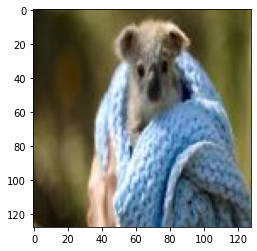

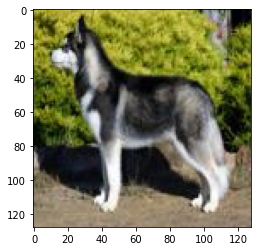

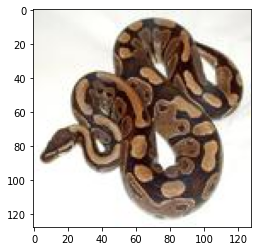

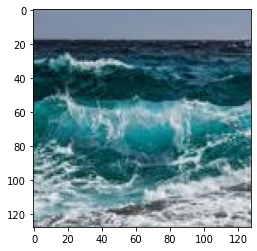

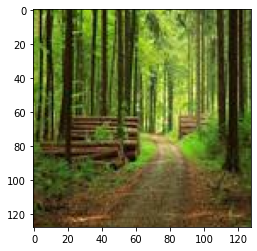

In [3]:
items = os.listdir('/content/drive/My Drive/images/') #reading the images directory content
print(items) #printing the names of the pictures

for each_image in items:
  if each_image.endswith(".jpg"): #the pictures must be in .jpg format!
    full_path = "/content/drive/My Drive/images/" + each_image
    each_image = cv2.imread(full_path)
    each_image = cv2.cvtColor(each_image,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(each_image) #showing the loaded pictures in original sizes

Reshaping and displaying the pictures to 128x128 size:

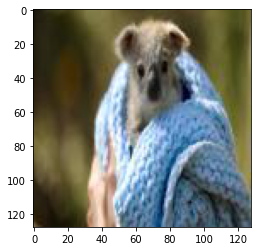

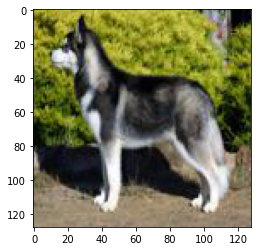

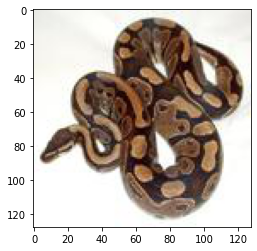

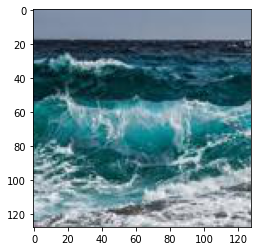

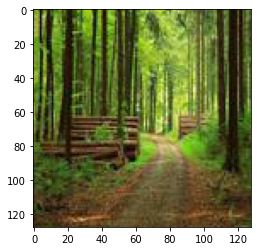

In [4]:
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    load_img_rz = np.array(Image.open(full_path).resize((128,128))) #resizing the picture to 128x128 size
    Image.fromarray(load_img_rz).save(full_path)
    plt.figure()
    plt.imshow(load_img_rz)

Listing all the 5 pictures RGB channels into one tensor:

In [5]:
folder = '/content/drive/My Drive/images' #reading in the images

read = lambda imname: np.asarray(Image.open(imname).convert("RGB")) #converting them to RGB pixel arrays

ims = [read(os.path.join(folder, filename)) for filename in os.listdir(folder)]
im_array = np.array(ims, dtype='uint8') 
print(im_array)

[[[[ 27  23  12]
   [ 29  25  14]
   [ 30  26  15]
   ...
   [101  96  40]
   [110 103  48]
   [112 106  48]]

  [[ 27  23  12]
   [ 29  25  14]
   [ 31  27  15]
   ...
   [101  96  40]
   [110 103  48]
   [112 105  50]]

  [[ 27  23  12]
   [ 30  26  15]
   [ 33  29  17]
   ...
   [101  96  41]
   [110 103  48]
   [112 105  50]]

  ...

  [[ 91  75  49]
   [ 72  58  31]
   [ 51  37  11]
   ...
   [ 87 104 120]
   [ 70  89 106]
   [ 60  79  96]]

  [[113  97  71]
   [ 92  76  50]
   [ 67  53  27]
   ...
   [ 91 110 127]
   [ 71  92 111]
   [ 59  80 101]]

  [[124 109  80]
   [106  90  64]
   [ 85  71  45]
   ...
   [ 89 107 127]
   [ 76  97 118]
   [ 68  89 110]]]


 [[[134 127  20]
   [175 168  61]
   [161 157  49]
   ...
   [  3   1   0]
   [  3   1   0]
   [ 15  13   0]]

  [[181 174  68]
   [173 166  60]
   [187 183  76]
   ...
   [  4   1   0]
   [  9   6   0]
   [ 22  19  10]]

  [[155 150  46]
   [146 141  39]
   [174 169  67]
   ...
   [  5   3   8]
   [ 12  10  13]
   [ 23  21

Calculating the pixels means for each channel:

In [7]:
from numpy import asarray

for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    image = Image.open(full_path)
    data = asarray(image)
    mean = np.mean(data, axis=(0,1))
    print(mean)

[105.09869385 110.30895996  99.85070801]
[110.25976562 109.58477783  72.56347656]
[179.7053833  166.26751709 156.26220703]
[ 85.66748047 123.16815186 133.68200684]
[92.18432617 98.77636719 40.45391846]


Calculating the pixels deviations for each channel:

In [9]:
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/My Drive/images/" + each_image
    image = Image.open(full_path)
    data = asarray(image)
    dev = np.std(data, axis=(0,1))
    print(dev)

[53.12571887 55.85522059 74.20055156]
[62.94652234 60.78307268 59.7153516 ]
[77.67036265 89.85582476 95.63260781]
[64.53613236 51.99727784 51.9889839 ]
[41.20112467 50.78075758 27.47867738]


Standardization of the datas:

Reading a sound file and making its spectogram:


<class 'numpy.ndarray'> <class 'int'>
(2577024,) 44100


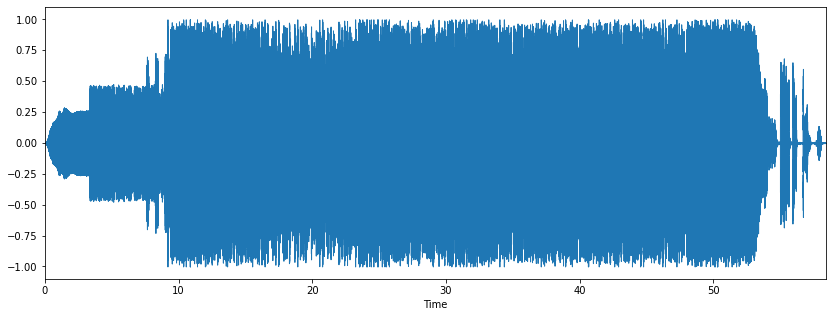

In [8]:
sound_path = "/content/drive/My Drive/sound/" #setting the location of the sound file
x, sr = librosa.load(sound_path + "sav.wav", sr=44100)

print(type(x), type(sr))
print(x.shape, sr)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr) #displaying the wave funciton

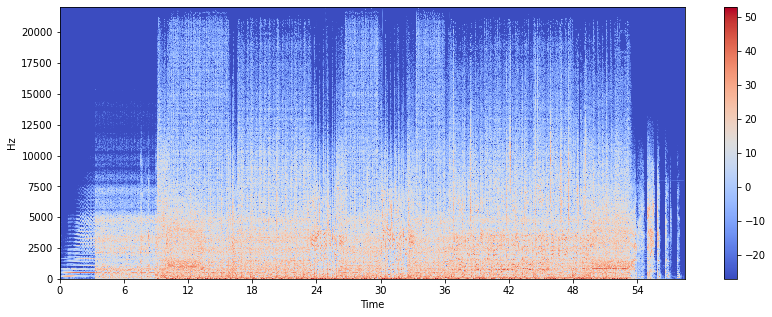

In [8]:
X = librosa.stft(x) #changing it to 
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Website downloading:

In [9]:
from bs4 import BeautifulSoup #importing the utilities
import requests
import json

url = 'https://en.wikipedia.org/wiki/Deep_learning' #the given URL which has to be read
response = requests.get(url, timeout=5)
content = BeautifulSoup(response.content, "html.parser") #getting the given webside content in html
text = content.get_text() #getting the html in plain text
print(text) #printing out





Deep learning - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"67420765-2a8a-407b-8f33-76a4ff2d15ff","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Deep_learning","wgTitle":"Deep learning","wgCurRevisionId":980693328,"wgRevisionId":980693328,"wgArticleId":32472154,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 errors: missing periodical","CS1 maint: archived copy as title","Articles with short description","Short description matches Wikidata","Wikipedia references cleanup from June 2020","All articles needing references cleanup",
"Articles covered by WikiPro

Histogram of character occurrences:

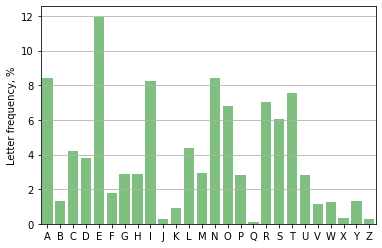

In [10]:
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' #the characters, which counting is necessary
lcount = dict([(l, 0) for l in letters])

#counting the letters in the given text
for l in text:
    try:
        lcount[l.upper()] += 1
    except KeyError:
        pass

norm = sum(lcount.values())

fig = plt.figure()
ax = fig.add_subplot(111)

#the parameters of the histogram
x = range(26)
ax.bar(x, [lcount[l]/norm * 100 for l in letters], width=0.8,
       color='g', alpha=0.5, align='center')
ax.set_xticks(x)
ax.set_xticklabels(letters)
ax.tick_params(axis='x', direction='out')
ax.set_xlim(-0.5, 25.5)
ax.yaxis.grid(True)
ax.set_ylabel('Letter frequency, %')
plt.show()